✅ Accuracy: 0.9795856185252895
📊 Classification Report:
               precision    recall  f1-score   support

   Disorders       0.98      1.00      0.99      3180
     Unknown       1.00      0.34      0.51       102

    accuracy                           0.98      3282
   macro avg       0.99      0.67      0.75      3282
weighted avg       0.98      0.98      0.97      3282



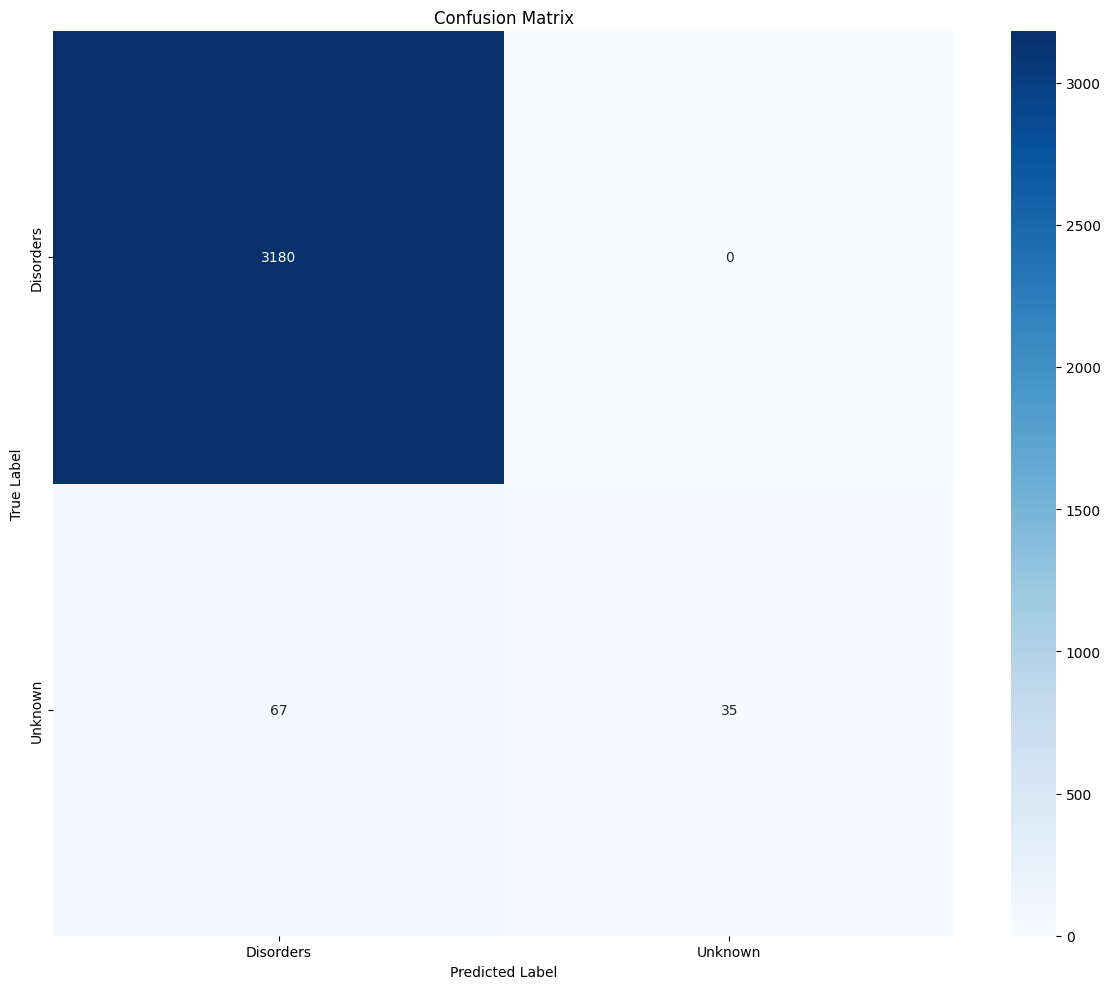

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import json
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

with open("medquad_qa_semantic_data.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)
df.dropna(subset=["question", "semantic_group"], inplace=True)

X = df["question"]
y = df["semantic_group"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

vectorizer = TfidfVectorizer(stop_words="english", max_features=10000, ngram_range=(1, 2))
X_vect = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vect, y_encoded, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

joblib.dump(model, "rf_tfidf_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(le, "label_encoder.pkl")

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
